# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 项目完成指南



本项目中的数据分析流程已经给出，但代码将完全由你自己进行书写，如果你无法完成本项目，说明你目前的能力并不足以完成 数据分析(进阶)纳米学位，建议先进行 数据分析（入门）纳米学位的学习，掌握进阶课程的先修知识。

对于数据分析过程的记录也是数据分析报告的一个重要部分，你可以自己在需要的位置插入Markdown cell，记录你在数据分析中的关键步骤和推理过程。比如：数据有什么样的特点，统计数据的含义是什么，你从可视化中可以得出什么结论，下一步分析是什么，为什么执行这种分析。如果你无法做到这一点，你也无法通过本项目。


> **小贴士**: 像这样的引用部分旨在为学员提供实用指导，帮助学员了解并使用 Jupyter notebook

## 提出问题

**问题**：
* 1.哪场战争的的规模最大？
* 2.哪个区域发生了最多的战争？
* 3.战争规模大小是否对结果有影响？


## 数据评估和清理

In [85]:
# TO DO: load pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# TO DO: load the dataset
battles = pd.read_csv('battles.csv', index_col = 'battle_number')
pd.set_option('display.max_columns', None)
battles.head()

,name,year,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
battle_number,,,,,,,,,,,,,,,,,,,,,,,,
1,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
2,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
3,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
4,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
5,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [87]:
# TO DO: check the dataset general info
battles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1 to 38
Data columns (total 24 columns):
name                  38 non-null object
year                  38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null float64
location              37 non-null o

In [88]:
battles.describe()

,year,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


从以上整体信息来看：
1. 有些变量缺失值太多，需要删除，比如attacker_2, defender_3,defender_4
2. 有些变量类型不对，需要修改，比如summer需要转换成boolean
3. attacker_size有异常值需要删除

In [89]:
# TO DO: clean the data 
# delet some null value
battles = battles.drop(['attacker_2','attacker_3','attacker_4','defender_2','defender_3','defender_4'], axis=1)

In [90]:
battles['summer']=battles['summer'].astype(bool, error='ignore')
battles[['major_death','major_capture']] = battles[['major_death','major_capture']].astype(bool, error='ignore')

In [91]:
battles['attacker_size'].replace(battles['attacker_size'].max(), np.nan, inplace=True)

In [92]:
# check the result after the modification
battles.info()
battles.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1 to 38
Data columns (total 18 columns):
name                  38 non-null object
year                  38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
defender_1            37 non-null object
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           38 non-null bool
major_capture         38 non-null bool
attacker_size         23 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                38 non-null bool
location              37 non-null object
region                38 non-null object
note                  5 non-null object
dtypes: bool(3), float64(2), int64(1), object(12)
memory usage: 4.9+ KB


,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
battle_number,,,,,,,,,,,,,,,,,,
1,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,True,False,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",True,Golden Tooth,The Westerlands,NaN
2,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,win,ambush,True,False,NaN,120.0,Gregor Clegane,Beric Dondarrion,True,Mummer's Ford,The Riverlands,NaN
3,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,False,True,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",True,Riverrun,The Riverlands,NaN
4,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,pitched battle,True,True,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",True,Green Fork,The Riverlands,NaN
5,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,True,True,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,True,Whispering Wood,The Riverlands,NaN


In [93]:
battles.describe()

,year,attacker_size,defender_size
count,38.000000,23.000000,19.000000
mean,299.105263,6027.000000,6428.157895
std,0.689280,6739.700607,6225.182106
min,298.000000,20.000000,100.000000
25%,299.000000,1250.000000,1070.000000
50%,299.000000,3500.000000,6000.000000
75%,300.000000,6000.000000,10000.000000
max,300.000000,21000.000000,20000.000000


## 数据探索分析

1.哪场战争的的规模最大？
***
- 统计每场战争总规模
- 去除有缺失值的战争
- 画条形图

In [94]:
battles['total_size'] = battles['attacker_size'] + battles['defender_size']
battles_total_size = battles.dropna(axis=0, subset=['name','total_size'])

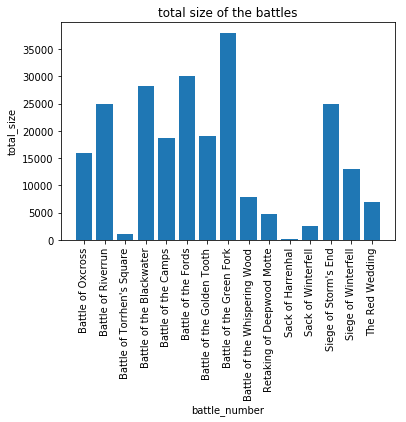

In [95]:
plt.bar(battles_total_size['name'],battles_total_size['total_size'])
plt.title('total size of the battles')
plt.ylabel('total_size')
plt.xlabel('battle_number')
plt.xticks(rotation=90)
plt.show()

从上图可以看出，Battle of Castle Black战役双方参战人数最多，并且远远高于其他战役，可能是重大转折点

2.哪个区域发生了最多的战争？
***
* 统计区域唯一值的数量
* 画直方图

In [96]:
battles_region = battles['region'].value_counts()

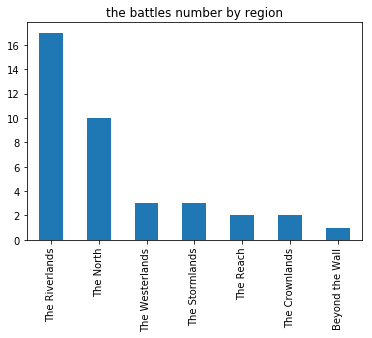

In [97]:
battles_region.plot.bar(title='the battles number by region', y ='total number', x = 'region');

按区域划分后，可以看出在The Riverlands区域战争次数是最多的，几乎是The North区域的两倍，其他区域的战争数量都在4次以下。

3.战争规模大小是否对结果有影响？
***
* 用散点图表示攻击方力量和防守方力量的关系，用不同颜色区别战争结果

In [98]:
att_def_outcome = battles.dropna(axis=0, subset=['attacker_size','defender_size','attacker_outcome'])

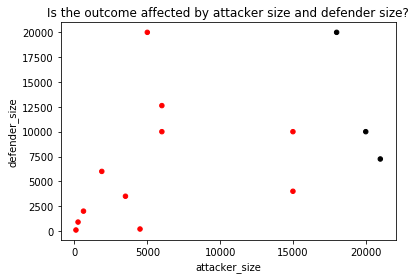

In [101]:
color = ['red' if x == 'win' else 'black' for x in att_def_outcome['attacker_outcome']]
att_def_outcome.plot.scatter(x='attacker_size', y='defender_size', c=color, title='Is the outcome affected by attacker size and defender size?');

上图所示，战争的最终结果和攻守双方的数量没有直接关系，但是以少胜多的战役比以多胜少的多

## 得出结论

* 1.哪场战争的的规模最大？
    Battle of Castal Black战役规模最大
    
* 2.哪个区域发生了最多的战争？
    The Riverlands发生了最多的战役
    
* 3.战争规模大小是否对结果有影响？
    战争规模大小不会影响结果

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：
* 感觉数据集缺少数字类型的数据，所以现在不能很好的分析变量之间的相关性
* 某些变量的数据缺失可能导致结果太片面化，不能真实反应情况
* 没有混淆相关性和因果性

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。